In [288]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # загружаем библиотеки

In [289]:
conn = psycopg2.connect(
    host='localhost',
    database ='postgres', 
    user='postgres', 
    password='Shol78000@' ) # Устанавливаем соединение с базой данных

In [290]:
cursor = conn.cursor() # взаимодействуем с базой данных. 

In [291]:
cursor.execute ("""SELECT od.order_id, od.product_id, od.unit_price, od.quantity,
       o.ship_country, o.order_date, o.required_date, o.shipped_date,
       p.product_name,
       c.customer_id, c.company_name,
	   e.first_name, e.title,
	   t.territory_description
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN products p ON od.product_id = p.product_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN employees e ON o.employee_id = e.employee_id
JOIN public.employee_territories et ON o.employee_id = et.employee_id
JOIN public.territories t ON t.territory_id = et.territory_id""" ) # выполняем SQL-запрос


In [292]:
df = cursor.fetchall() # извлекаем все строки результата выполнения запроса 

In [293]:
df

[(10248,
  11,
  14.0,
  12,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Queso Cabrales',
  'VINET',
  'Vins et alcools Chevalier',
  'Steven',
  'Sales Manager',
  'Providence'),
 (10248,
  11,
  14.0,
  12,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Queso Cabrales',
  'VINET',
  'Vins et alcools Chevalier',
  'Steven',
  'Sales Manager',
  'Morristown'),
 (10248,
  11,
  14.0,
  12,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Queso Cabrales',
  'VINET',
  'Vins et alcools Chevalier',
  'Steven',
  'Sales Manager',
  'Edison'),
 (10248,
  11,
  14.0,
  12,
  'France',
  datetime.date(1996, 7, 4),
  datetime.date(1996, 8, 1),
  datetime.date(1996, 7, 16),
  'Queso Cabrales',
  'VINET',
  'Vins et alcools Chevalier',
  'Steven',
  'Sales Manager',
  'New York'),
 (10248,
  11,
  14.0,
  12,
  'France',
  datetim

In [294]:
st=pd.DataFrame(df,
    columns=[ 'order_id', 'product_id', 'unit_price', 'quantity',
'ship_country','order_date', 'required_date', 'shipped_date', 'product_name',
'customer_id', 'company_name', 'first_name', 'title','territory_description']) # указываем порядок столбцов в новом DataFrame 

In [295]:
st

,order_id,product_id,unit_price,quantity,ship_country,order_date,required_date,shipped_date,product_name,customer_id,company_name,first_name,title,territory_description
0,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Providence
1,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Morristown
2,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Edison
3,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York
4,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11077,73,15.00,2,USA,1998-05-06,1998-06-03,None,Röd Kaviar,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward
10125,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton
10126,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward
10127,11077,77,13.00,2,USA,1998-05-06,1998-06-03,None,Original Frankfurter grüne Soße,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton


In [296]:
def date_mark(row):
    if row['shipped_date'] == None:
        return 1
    else:
        return 0
# пишем функцию в которой определяем:
# если 1 - Акт_заказ (НЕТ даты доставки (ожидаем деньги) order_act_flag = 1)
# если 0 - Неакт_заказ (ЕСТЬ даты доставки (получили деньги) order_act_flag = 0)

In [297]:
st['order_act_flag'] = st.apply(date_mark, axis = 1) 

In [298]:
st

,order_id,product_id,unit_price,quantity,ship_country,order_date,required_date,shipped_date,product_name,customer_id,company_name,first_name,title,territory_description,order_act_flag
0,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Providence,0
1,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Morristown,0
2,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Edison,0
3,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York,0
4,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11077,73,15.00,2,USA,1998-05-06,1998-06-03,None,Röd Kaviar,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward,1
10125,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton,1
10126,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward,1
10127,11077,77,13.00,2,USA,1998-05-06,1998-06-03,None,Original Frankfurter grüne Soße,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton,1


## 1. Выведите клиента с наибольшим количеством активных заказов

In [299]:
# Фильтрация только активных заказов
cl_act_zak = st[st['order_act_flag'] == 1]

# Группировка по клиентам и активности заказа, подсчет уникальных заказов и сортировка по убыванию
cl_act_zak = cl_act_zak.groupby(['customer_id', 'order_act_flag']).agg({'order_id': 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)


In [300]:
cl_act_zak

,customer_id,order_act_flag,order_id
4,ERNSH,1,2
5,GREAL,1,2
8,LILAS,1,2
0,BLAUS,1,1
11,QUEEN,1,1
16,RICSU,1,1
15,RICAR,1,1
14,REGGC,1,1
13,RATTC,1,1
12,RANCH,1,1


## 2. Выведите клиентов по количеству активных и неактивных заказов



In [301]:
cl_act_neact_zak = st.groupby(['customer_id', 'order_act_flag']).agg({'order_id': 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)


In [302]:
cl_act_neact_zak # если 1 - Акт_заказ (НЕТ даты доставки (ожидаем деньги) order_act_flag = 1)
# если 0 - Неакт_заказ (ЕСТЬ даты доставки (получили деньги) order_act_flag = 0)

,customer_id,order_act_flag,order_id
85,SAVEA,0,31
72,QUICK,0,28
23,ERNSH,0,28
41,HUNGO,0,19
27,FOLKO,0,19
...,...,...,...
71,QUEEN,1,1
46,LAMAI,1,1
66,PERIC,1,1
50,LEHMS,1,1


## 3. Нарисуйте график по топ 10 самых больших по заказам клиентов, разделенных на активные и неактивные заказы



In [303]:
# Группировка данных по клиентам и активности заказа, подсчет количества уникальных заказов
grouped_orders = st.groupby(['customer_id', 'order_act_flag']).agg({'order_id': 'nunique'}).reset_index()

# Сортировка по убыванию количества заказов
grouped_orders_sorted = grouped_orders.sort_values(by='order_id', ascending=False)

# Выбор топ-10 клиентов
top_10_customers = grouped_orders_sorted['customer_id'].head(10)

# Фильтрация заказов для топ-10 клиентов
top_10_orders = st[st['customer_id'].isin(top_10_customers)]

# Группировка заказов для топ-10 клиентов и активности заказа
final_table = top_10_orders.groupby(['customer_id', 'order_act_flag']).agg({'order_id': 'nunique'}).reset_index()

In [304]:
final_table# если 1 - Акт_заказ (НЕТ даты доставки (ожидаем деньги) order_act_flag = 1)
# если 0 - Неакт_заказ (ЕСТЬ даты доставки (получили деньги) order_act_flag = 0)

,customer_id,order_act_flag,order_id
0,BERGS,0,18
1,BONAP,0,16
2,BONAP,1,1
3,ERNSH,0,28
4,ERNSH,1,2
5,FOLKO,0,19
6,FRANK,0,15
7,HILAA,0,18
8,HUNGO,0,19
9,QUICK,0,28


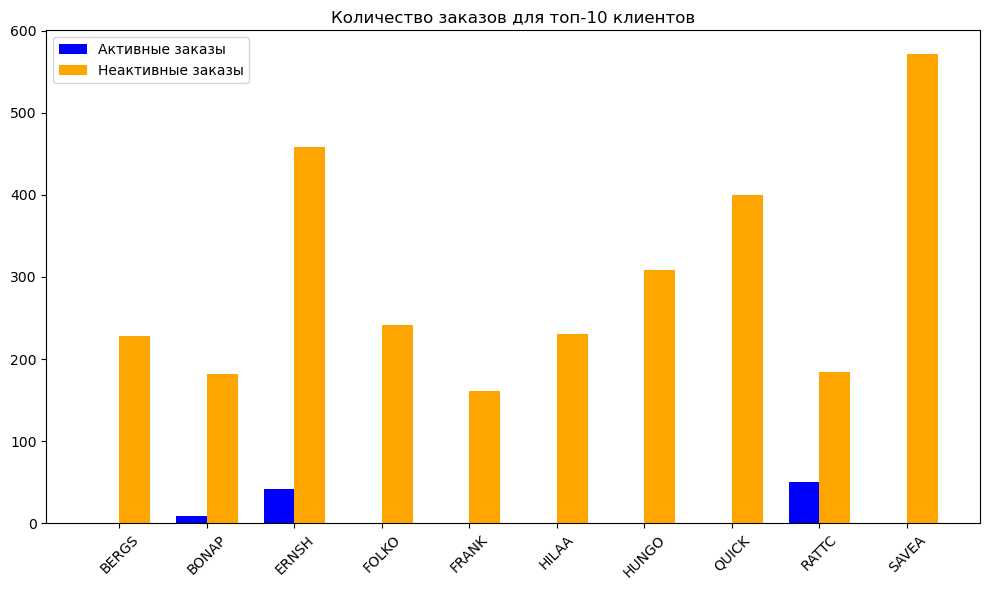

In [305]:
# Группировка данных по клиентам и активности заказа, подсчет общего количества заказов
total_orders = st.groupby(['customer_id', 'order_act_flag']).size().unstack(fill_value=0)

# Выбор топ-10 клиентов
top_10_customers = final_table_sorted['customer_id'].head(10)

# Фильтрация заказов для топ-10 клиентов
top_10_total_orders = total_orders.loc[top_10_customers]

# Построение столбчатой диаграммы
ind = np.arange(len(top_10_customers))  # положение каждой группы столбцов
width = 0.35  # ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(ind, top_10_total_orders[1], width, label='Активные заказы', color='blue')
bar2 = ax.bar(ind + width, top_10_total_orders[0], width, label='Неактивные заказы', color='orange')

ax.set_title('Количество заказов для топ-10 клиентов')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(top_10_customers)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 4. Выведите продукт с наибольшим количеством активных заказов




In [306]:
# Находим название продукта с наибольшим количеством активных заказов
product_name_most_active_orders = st.loc[st['product_id'] == product_with_most_active_orders, 'product_name'].iloc[0]

# Создаем DataFrame с информацией о продукте с наибольшим количеством активных заказов
product_most_active_orders_info = pd.DataFrame({
    'Идентификатор продукта': [product_with_most_active_orders],
    'Название продукта': [product_name_most_active_orders]})

product_most_active_orders_info


,Идентификатор продукта,Название продукта
0,2,Chang


## 5. Выведите количества продуктов разделенные по активности



In [307]:
# Группируем данные по активности заказа и подсчитываем количество уникальных продуктов
products_by_activity = st.groupby('order_act_flag')['product_id'].nunique().reset_index()

# Переименовываем столбцы
products_by_activity.columns = ['order_act_flag', 'count_of_products']


In [308]:
products_by_activity
# если 1 - Акт_заказ (НЕТ даты доставки (ожидаем деньги) order_act_flag = 1)
# если 0 - Неакт_заказ (ЕСТЬ даты доставки (получили деньги) order_act_flag = 0)

,order_act_flag,count_of_products
0,0,77
1,1,49


## 6. Нарисуйте диаграмму по топ 10 самым продаваемым продуктам

In [309]:
# Группируем данные по продуктам и подсчитываем количество продаж каждого продукта
top_selling_products = st.groupby('product_name').size().nlargest(10)

In [310]:
top_selling_products

product_name
Raclette Courdavault               281
Guaraná Fantástica                 274
Gorgonzola Telino                  246
Jack's New England Clam Chowder    228
Gnocchi di nonna Alice             223
Camembert Pierrot                  221
Pavlova                            202
Rhönbräu Klosterbier               201
Sir Rodney's Scones                201
Tarte au sucre                     199
dtype: int64

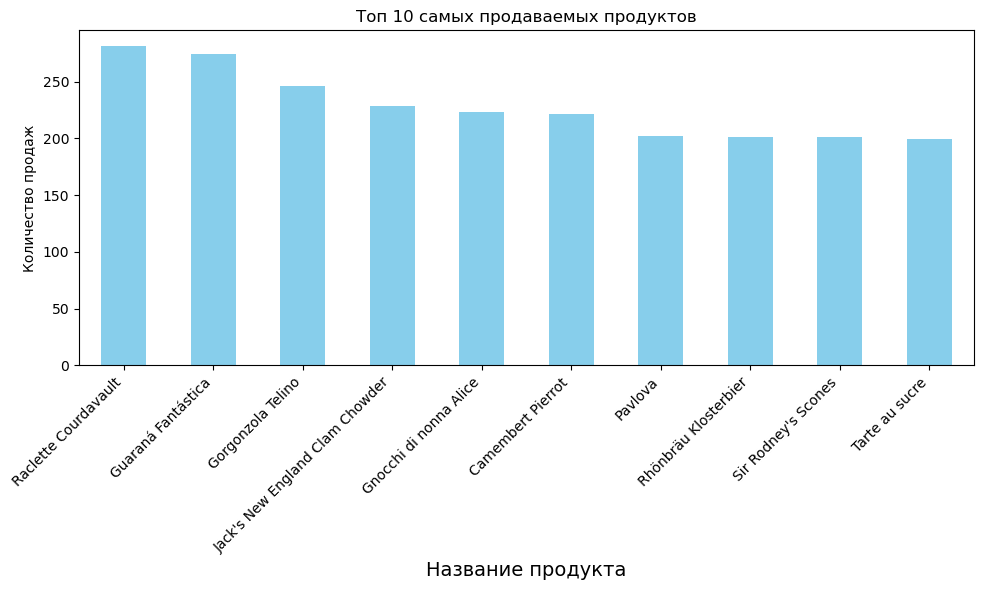

In [311]:
# Строим диаграмму
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Топ 10 самых продаваемых продуктов')
plt.xlabel('Название продукта', fontsize=14) 
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Добавьте в вашу таблицу должность и имя сотрудника, а также его город, где он работает



In [312]:
st

,order_id,product_id,unit_price,quantity,ship_country,order_date,required_date,shipped_date,product_name,customer_id,company_name,first_name,title,territory_description,order_act_flag
0,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Providence,0
1,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Morristown,0
2,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,Edison,0
3,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York,0
4,10248,11,14.00,12,France,1996-07-04,1996-08-01,1996-07-16,Queso Cabrales,VINET,Vins et alcools Chevalier,Steven,Sales Manager,New York,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,11077,73,15.00,2,USA,1998-05-06,1998-06-03,None,Röd Kaviar,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward,1
10125,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton,1
10126,11077,75,7.75,4,USA,1998-05-06,1998-06-03,None,Rhönbräu Klosterbier,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Neward,1
10127,11077,77,13.00,2,USA,1998-05-06,1998-06-03,None,Original Frankfurter grüne Soße,RATTC,Rattlesnake Canyon Grocery,Nancy,Sales Representative,Wilton,1


## 8. Теперь выведите количество активных и неактивных заказов по сотрудникам

In [313]:
# Группировка данных по сотрудникам и флагу активности заказа и подсчет количества заказов
orders_by_employee = st.groupby(['first_name', 'title', 'order_act_flag']).size().reset_index(name='order_count')

# Фильтрация данных по активным и неактивным заказам
active_orders_by_employee = orders_by_employee[orders_by_employee['order_act_flag'] == 1]
inactive_orders_by_employee = orders_by_employee[orders_by_employee['order_act_flag'] == 0]

# Вывод результатов
active_orders_by_employee
inactive_orders_by_employee


,first_name,title,order_act_flag,order_count
0,Andrew,"Vice President, Sales",0,1624
2,Anne,Sales Representative,0,728
4,Janet,Sales Representative,0,1284
5,Laura,Inside Sales Coordinator,0,1000
7,Margaret,Sales Representative,0,1227
9,Michael,Sales Representative,0,820
11,Nancy,Sales Representative,0,628
13,Robert,Sales Representative,0,1710
15,Steven,Sales Manager,0,819


In [314]:
active_orders_by_employee

,first_name,title,order_act_flag,order_count
1,Andrew,"Vice President, Sales",1,63
3,Anne,Sales Representative,1,21
6,Laura,Inside Sales Coordinator,1,40
8,Margaret,Sales Representative,1,33
10,Michael,Sales Representative,1,20
12,Nancy,Sales Representative,1,62
14,Robert,Sales Representative,1,50


## 9. Выгрузите таблицу с заказами и сотрудниками в эксель. (Метод to_excel)

In [315]:
# Указание пути для сохранения файла Excel с активными заказами по сотрудникам
active_orders_excel_path = "active_orders_by_employee.xlsx"
# Сохранение таблицы с активными заказами по сотрудникам в Excel
active_orders_by_employee.to_excel(active_orders_excel_path, index=False)
print("Таблица с активными заказами по сотрудникам успешно сохранена в Excel.")

# Указание пути для сохранения файла Excel с неактивными заказами по сотрудникам
inactive_orders_excel_path = "inactive_orders_by_employee.xlsx"
# Сохранение таблицы с неактивными заказами по сотрудникам в Excel
inactive_orders_by_employee.to_excel(inactive_orders_excel_path, index=False)
print("Таблица с неактивными заказами по сотрудникам успешно сохранена в Excel.")


Таблица с активными заказами по сотрудникам успешно сохранена в Excel.
Таблица с неактивными заказами по сотрудникам успешно сохранена в Excel.
